<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


### Importing Needed packages

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
plt.style.use("seaborn")

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [36]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-21 20:26:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-07-21 20:26:45 (1.83 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in

In [37]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Lets first have a descriptive exploration on our data.

In [38]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [39]:
df.describe(include="object")

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [40]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [41]:
import seaborn as sns

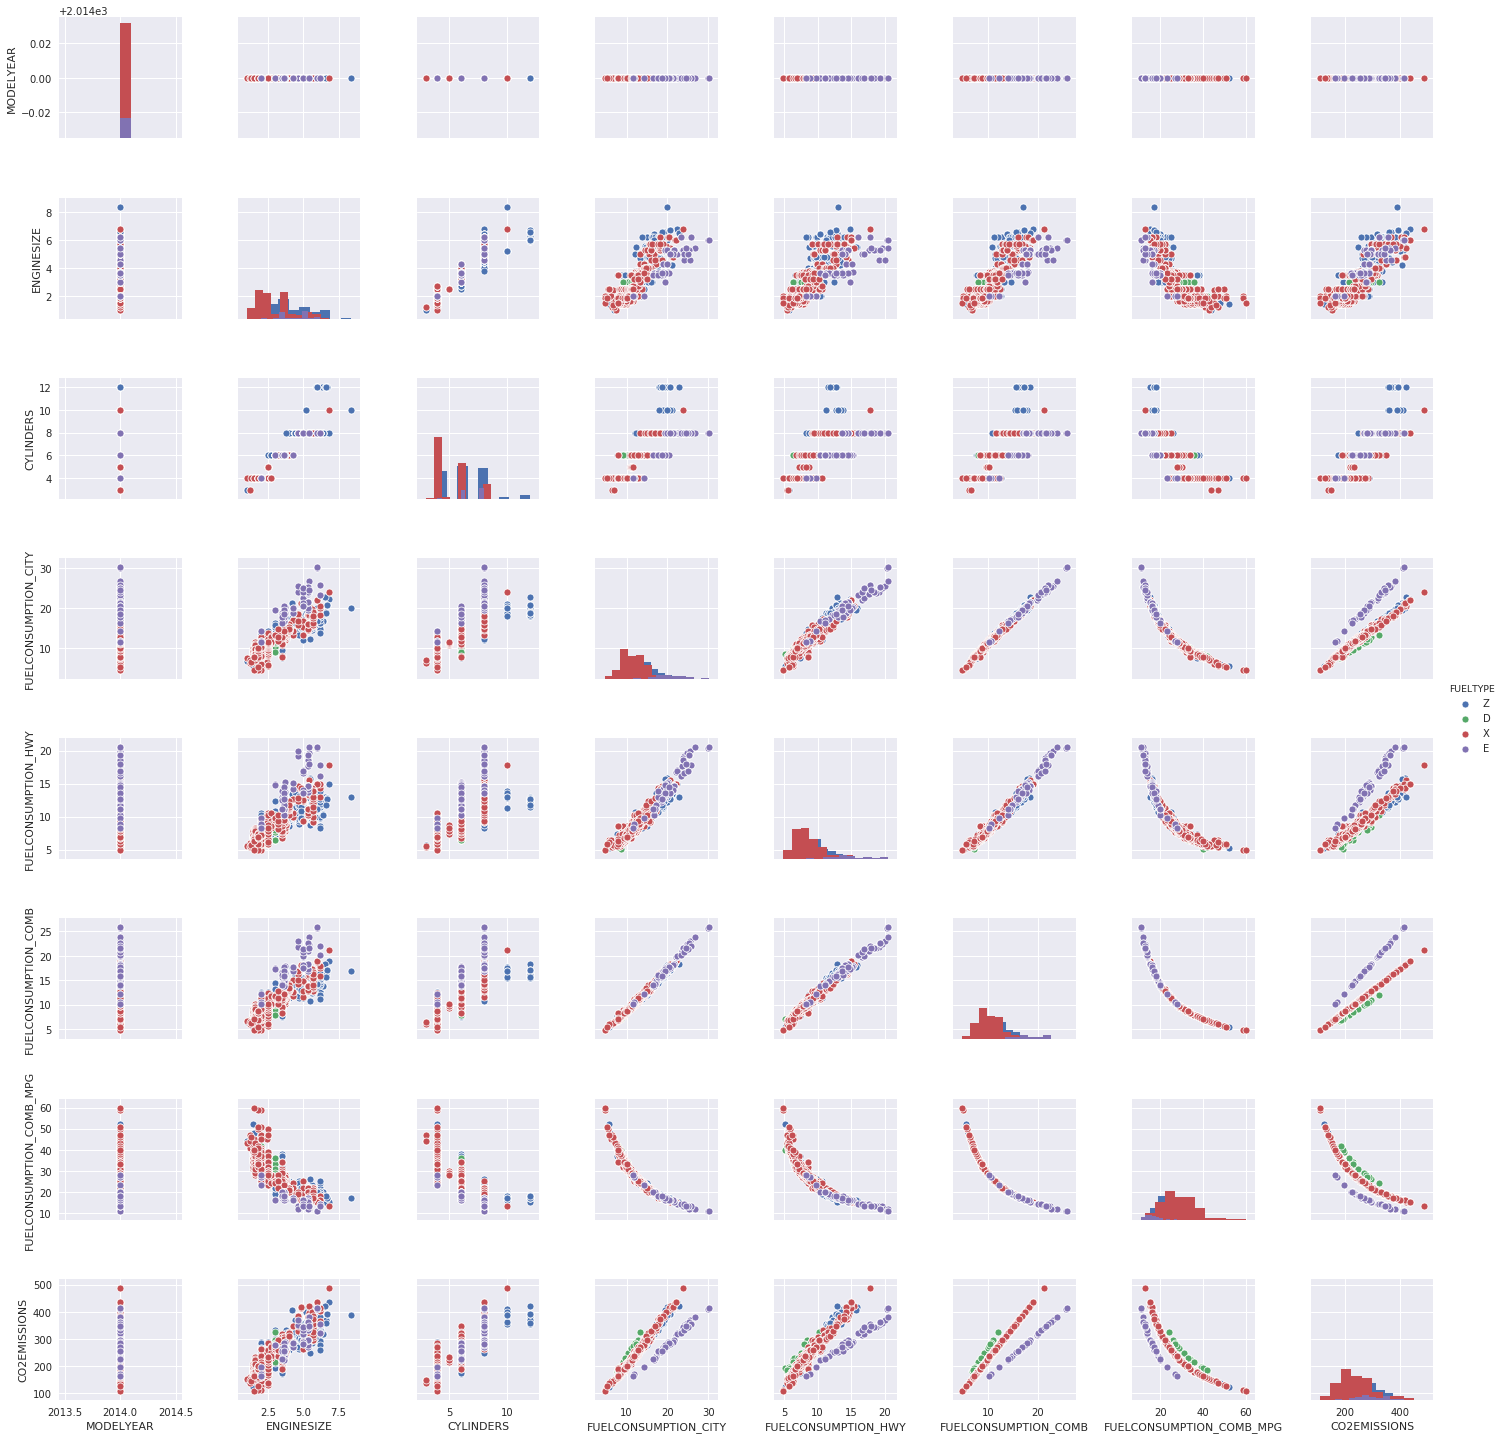

In [42]:
"""
strings = ["MODELYEAR",
           "ENGINESIZE",
           "CYLINDERS",
           "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY",
           "FUELCONSUMPTION_COMB",
           "FUELCONSUMPTION_COMB_MPG",
           "CO2EMISSIONS"]
"""
sns.pairplot(df,
             hue="FUELTYPE",
             diag_kind="hist")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


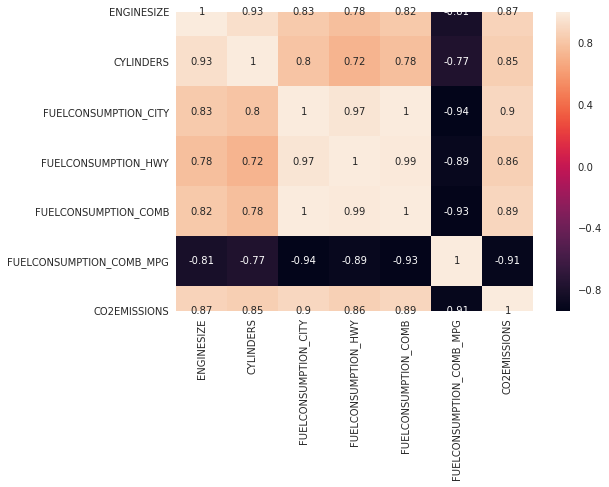

In [44]:
sns.heatmap(df.drop("MODELYEAR",axis=1).corr(),annot=True)

Lets select some features to explore more.

In [45]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these fearues:

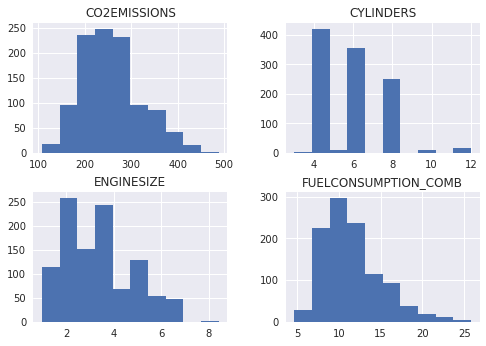

In [46]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

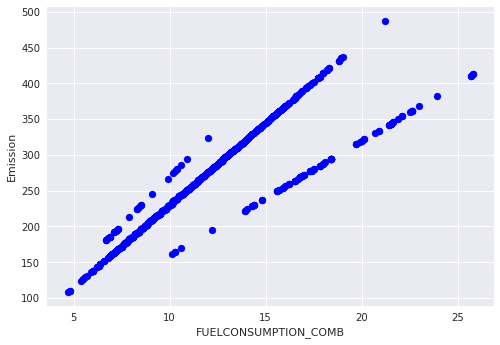

In [47]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

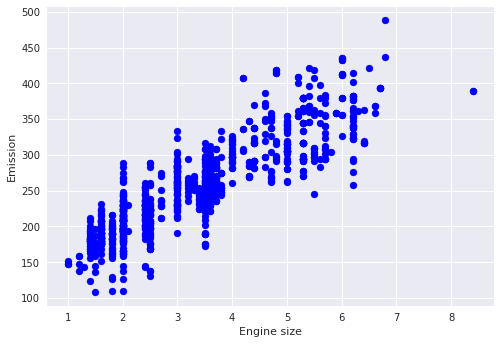

In [48]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
plot __CYLINDER__ vs the Emission, to see how linear is their relation:

Text(0, 0.5, 'CO2 Emissions')

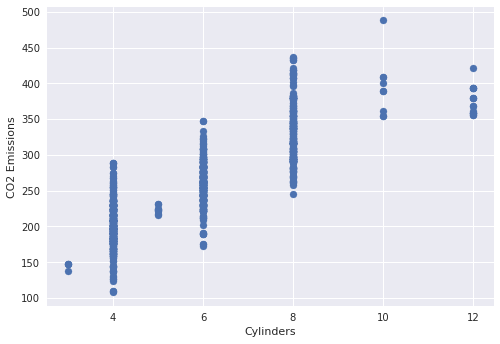

In [49]:
# write your code here

#df[["CYLINDERS","CO2EMISSIONS"]].plot(kind="scatter")

plt.scatter(x=df["CYLINDERS"],y=df["CO2EMISSIONS"])

plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")

Double-click __here__ for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.



In [50]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

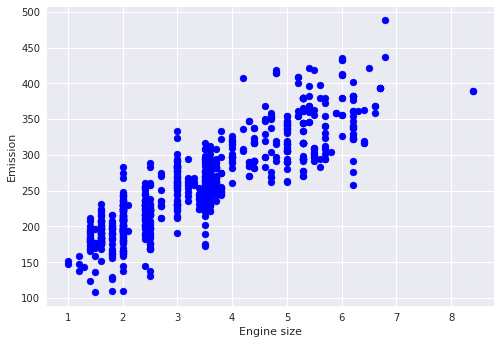

In [51]:
plt.scatter(train.ENGINESIZE,
            train.CO2EMISSIONS,
            color='blue')

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [52]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.9172529]]
Intercept:  [126.38800136]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

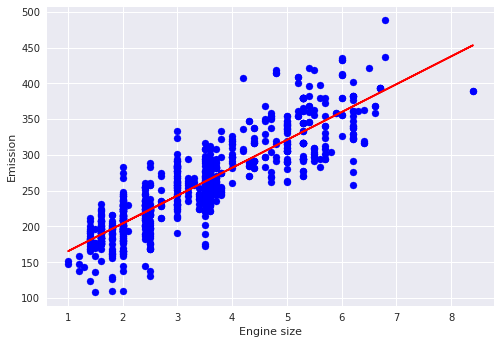

In [53]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [54]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.75
Residual sum of squares (MSE): 1112.37
R2-score: 0.61


# Regresion Multivariate

In [55]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [57]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [58]:
df.describe(include="object")

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [59]:
dummies_make = pd.get_dummies(df["MAKE"],
                              drop_first=True)
dummies_make

,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,...,PORSCHE,RAM,ROLLS-ROYCE,SCION,SMART,SRT,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
dummies = pd.get_dummies(df[["MAKE",
                             "MODEL",
                             "VEHICLECLASS",
                             "TRANSMISSION",
                             "FUELTYPE",
                             "CYLINDERS"]],
                         drop_first=True)
dummies
#MAKE	MODEL	VEHICLECLASS	TRANSMISSION	FUELTYPE

,CYLINDERS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1063,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1064,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1065,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
nuevo_df = pd.concat((df,dummies),axis=1)
nuevo_df.drop(["MAKE",
               "MODEL",
               "VEHICLECLASS",
               "TRANSMISSION",
               "FUELTYPE",
               "MODELYEAR",
               "CYLINDERS"],
              axis = 1,
              inplace = True)
nuevo_df

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,6.7,8.5,33,196,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,11.2,7.7,9.6,29,221,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.5,6.0,5.8,5.9,48,136,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3.5,12.7,9.1,11.1,25,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,12.1,8.7,10.6,27,244,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,24,271,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1063,3.2,13.2,9.5,11.5,25,264,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1064,3.0,13.4,9.8,11.8,24,271,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1065,3.2,12.9,9.3,11.3,25,260,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
X = nuevo_df.drop(["CO2EMISSIONS"],
                  axis=1)
X

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,6.7,8.5,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,11.2,7.7,9.6,29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.5,6.0,5.8,5.9,48,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3.5,12.7,9.1,11.1,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,12.1,8.7,10.6,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1063,3.2,13.2,9.5,11.5,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1064,3.0,13.4,9.8,11.8,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1065,3.2,12.9,9.3,11.3,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
y = nuevo_df[["CO2EMISSIONS"]]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
predictions = lr.predict(X_test)

In [70]:
from sklearn.metrics import r2_score 

In [75]:
print("R2-score: %.2f" % r2_score(y_test,predictions))

R2-score: -1563684641114301661184.00


In [76]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y_test) ** 2))
# print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1360848000101.23
Residual sum of squares (MSE): 6396792040231354824130560.00


In [92]:
df.describe(include="object")

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [115]:
fueltype_dummy = pd.get_dummies(df["FUELTYPE"],drop_first=True)
fueltype_dummy

,E,X,Z
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1062,0,1,0
1063,0,1,0
1064,0,1,0
1065,0,1,0


In [124]:
cylinder_dummies = pd.get_dummies(df["CYLINDERS"],drop_first=True)
cylinder_dummies

,4,5,6,8,10,12
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1062,0,0,1,0,0,0
1063,0,0,1,0,0,0
1064,0,0,1,0,0,0
1065,0,0,1,0,0,0


In [117]:
nuevo_df = pd.concat([df,fueltype_dummy,cylinder_dummies],axis=1)
nuevo_df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,...,CO2EMISSIONS,E,X,Z,4,5,6,8,10,12
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,...,196,0,0,1,1,0,0,0,0,0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,...,221,0,0,1,1,0,0,0,0,0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,...,136,0,0,1,1,0,0,0,0,0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,...,255,0,0,1,0,0,1,0,0,0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,...,244,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,...,271,0,1,0,0,0,1,0,0,0
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,...,264,0,1,0,0,0,1,0,0,0
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,...,271,0,1,0,0,0,1,0,0,0
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,...,260,0,1,0,0,0,1,0,0,0


In [125]:
X = nuevo_df.drop(["MODELYEAR",
                   "MAKE",
                   "MODEL",
                   "VEHICLECLASS",
                   "CYLINDERS",
                   "TRANSMISSION",
                   "FUELTYPE",
                   "CO2EMISSIONS"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                1067 non-null   float64
 1   FUELCONSUMPTION_CITY      1067 non-null   float64
 2   FUELCONSUMPTION_HWY       1067 non-null   float64
 3   FUELCONSUMPTION_COMB      1067 non-null   float64
 4   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 5   E                         1067 non-null   uint8  
 6   X                         1067 non-null   uint8  
 7   Z                         1067 non-null   uint8  
 8   4                         1067 non-null   uint8  
 9   5                         1067 non-null   uint8  
 10  6                         1067 non-null   uint8  
 11  8                         1067 non-null   uint8  
 12  10                        1067 non-null   uint8  
 13  12                        1067 non-null   uint8  
dtypes: float

In [127]:
y = df[["CO2EMISSIONS"]]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [129]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
predictions = lr.predict(X_test) 

In [131]:
r2_score(y_test,predictions)

0.9928368672090433

In [134]:
from sklearn.metrics import mean_absolute_error
print("The mean absolute error is: ",mean_absolute_error(y_test,predictions))
print("R2 score is: ",r2_score(y_test,predictions))
# print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y_test)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y_test) ** 2))
# print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


The mean absolute error is:  3.539337408657242
R2 score is:  0.9928368672090433


In [149]:
coeficients = pd.DataFrame(lr.coef_,
                           columns=X.columns,
                           index=["Coeff"])
coeficients.transpose()

,Coeff
ENGINESIZE,1.194210
FUELCONSUMPTION_CITY,-0.418977
FUELCONSUMPTION_HWY,-0.615152
FUELCONSUMPTION_COMB,17.986033
FUELCONSUMPTION_COMB_MPG,-1.796152
E,-138.333823
X,-32.024091
Z,-33.292497
4,-6.500845
5,-9.420393


In [155]:
intercept = pd.DataFrame(lr.intercept_,
                         columns=y.columns,
                         index=["Intercept"])
intercept.transpose()

,Intercept
CO2EMISSIONS,148.652256


## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​